Accuracy of testing set 86.11111111111111


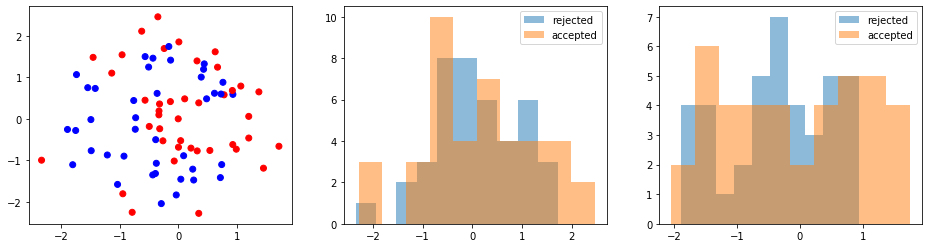

In [2]:
import pandas as pd
import numpy as np
from numpy import random,sqrt,sin,cos,pi,log
import matplotlib.pyplot as plt
maxAcc = 0
np.random.seed(1739)
def split(dataset,size):
    train_set = dataset[:size,]
    test_set = dataset[size:,]
    return train_set,test_set

def calcPhi(y):
    phi = 0
    for i in y:
        if i == 1:
            phi += 1
    phi = phi/len(y)
    return phi

def calcMu0(x,y):
    Mu0 = np.zeros(x.shape[1])
    count = 0
    for i in range(len(y)):
        if y[i] == 0:
            Mu0 += x[i]
            count += 1
    Mu0 = Mu0/(count)
    return Mu0

def calcMu1(x,y):
    Mu1 = np.zeros(x.shape[1])
    count = 0
    for i in range(len(y)):
        if y[i] == 1:
            Mu1 += x[i]
            count += 1
    Mu1 = Mu1/count
    return Mu1

def calcSigma(x,y,Mu0,Mu1):
    sigma = np.zeros((x.shape[1],x.shape[1]))
    count = 0
    for i in range(len(y)):
        if y[i] == 1:
            sigma += ((x[i] - Mu1).reshape((5,1)))@((x[i] - Mu1).reshape((1,5)))
            count += 1
    sigma /= count
    return sigma

def calcPy(y,phi):
    if y == 0:
        return 1-phi
    else:
        return phi

def calcPxPy(x,mu,sigma):
    pi = np.pi
    n = 1
    constant_term = 1/(((2*pi)**(5/2))*((np.linalg.det(sigma))**0.5))
    exponent_term = (((x-mu).reshape(1,5)) @ (np.linalg.inv(sigma)) @ ((x-mu).reshape(5,1)))
    return (constant_term * np.exp(-0.5 * exponent_term[0][0]))

def predictor(x,y,Mu0,Mu1,sigma,phi):
    accuracy = 0
    y_pred = list()
    for i in range(len(y)):
        pred1 = calcPxPy(x[i], Mu0, sigma)#*calcPy(0, phi)
        pred2 = calcPxPy(x[i], Mu1, sigma)#*calcPy(1, phi)
        
        if pred1 > pred2:
            y_pred.append(0)
        else: 
            y_pred.append(1)
    for i in range(len(y)):
        if y_pred[i] == y[i]:
            accuracy += 1
    return accuracy

def getGaussian(dataset):
    result_gaussian = dataset[:,2]
    uniformDist_1, uniformDist_2 = dataset[:,0], dataset[:,1]
    uniformDist_1 = (uniformDist_1 - min(uniformDist_1))/(max(uniformDist_1) - min(uniformDist_1))
    uniformDist_2 = (uniformDist_2 - min(uniformDist_2))/(max(uniformDist_2) - min(uniformDist_2))
    delIndex = list()
    for i in range(len(uniformDist_1)):
        if uniformDist_1[i] == 0:
            delIndex.append(i)
    uniformDist_1 = np.delete(uniformDist_1,delIndex,0)
    uniformDist_2 = np.delete(uniformDist_2,delIndex,0)
    result_gaussian = np.delete(result_gaussian,delIndex,0)
    gaussianDist_1 = sqrt(-2*log(uniformDist_1))*cos(2*pi*uniformDist_2)
    gaussianDist_2 = sqrt(-2*log(uniformDist_1))*sin(2*pi*uniformDist_2)
    return gaussianDist_1, gaussianDist_2,result_gaussian

dataset = pd.read_csv("microchip.csv").iloc[:,0:3].to_numpy()
np.random.shuffle(dataset)

"""Using gaussian distribution"""
gaussian_set1, gaussian_set2, result = getGaussian(dataset)
dataset = np.column_stack((gaussian_set1,gaussian_set2,gaussian_set1*gaussian_set2,gaussian_set1**2,gaussian_set2**2))
r = dataset.shape[0]

"""Splitting into training and test for gaussian"""
trainSize = int(0.70*r)
testSize = r  - trainSize
x_train, x_test = split(dataset,trainSize)
y_train, y_test = split(result,trainSize)


"""Visualising training set"""
colorPoint = ['blue' if i==1 else 'red' for i in y_train]
fig,axs = plt.subplots(1,3,figsize = (16,4))
axs[0].scatter(x_train[:,0],x_train[:,1],c = colorPoint)
x_train_0 = list()
x_train_1 = list()
for i in range(len(y_train)):
    if y_train[i] == 0:
        x_train_0.append(x_train[i])
    else:
        x_train_1.append(x_train[i])
x_train_0 = np.asarray(x_train_0)
x_train_1 = np.asarray(x_train_1)
axs[1].hist(x_train_0[:,0],alpha = 0.5)
axs[1].hist(x_train_0[:,1],alpha = 0.5)
axs[1].legend(['rejected', 'accepted'])
axs[2].hist(x_train_1[:,0],alpha = 0.5)
axs[2].hist(x_train_1[:,1],alpha = 0.5)
axs[2].legend(['rejected', 'accepted'])

"""Calculate phi, Mu0, Mu1, sigma for gaussian"""
phi = calcPhi(y_train)
Mu0 = calcMu0(x_train,y_train)
Mu1 = calcMu1(x_train,y_train)
sigma = calcSigma(x_train,y_train,Mu0,Mu1)
accuracy = predictor(x_test,y_test,Mu0,Mu1,sigma,phi)
print("Accuracy of testing set",accuracy/testSize*100)
